## Gradient Descent

# 새 섹션

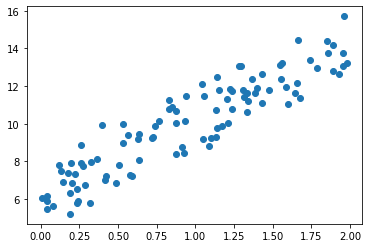

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1) 

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y) #y = w_0+w_1 X_1 ->  벡터의 길이  
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1) #벡터크기에 따라서 0 mapping시켜줘.
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 #np.matmul써도 되지만, 어차피 벡터 계산이기 때문에 dot 을 썻음. y = ax+b ax->np.dot(X,w1.T)
    diff = y-y_pred # error function  = (실제값 - 예측값)
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))  # 초기값 ones로 셋팅 N크기만큼 받아들이고,

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff)) # error ftn : mse(mean square error)
    #/summation_i^n (y-y_hat)(-x_i)
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # summation_i^n (y-y_hat)(-x_1)
    
    return w1_update, w0_update #W_0,W_1 update

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update #w1(왼쪽에 있는)->new, w_1(오른쪽에 있는) ->old
        # w1_update = gradient descent 방법
        #new = old - update (update = 0->new =old ) 최적의 값을 찾음.
        w0 = w0 - w0_update
              
    return w1, w0

In [ ]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    print(cost) # root(실제값-예측값) 다 더해서 저장한게 cost
    return cost


In [ ]:
w1, w0 = gradient_descent_steps(X, y, iters=1000) #1000번을 반복
#최적의 값을 뽑고 그때의 cost값을 출력.
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

ValueError: ignored

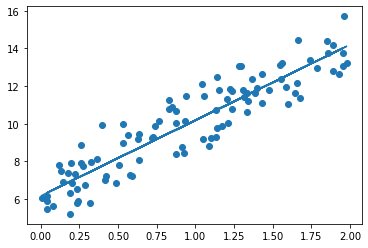

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

# data가 적으면 gradient descent 방법을 사용할텐데,  data가 굉장히 큼.

-> 미분자체가 계산량이 많아짐 / 변수가 많아서 미분이 많아짐

통계에서는 모집단(전체) -> 표본(sample) 통계량 혹은 결론

stochastic

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장 (참고 : https://medium.com/@shistory02/numpy-permutation-vs-shuffle-34fe56f0c246)
        # Stochastic gradient descent / Mini-batch graident descent (참고 : https://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


TypeError: ignored

In [ ]:
# 보폭에 따른 결과를 보려고 함.
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.5, 0.3, 0.8]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()


## Sklearn 데이터셋 활용

**Bulid-in dataset**


- load_boston: 보스톤 집값 데이터
- load_iris: 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digits: 손글씨 데이터
- load_linnerud: multi-output regression 용 데이터
- load_wine: 와인 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터

### Sklearn Linear Regression Tutorial with Boston House Dataset

- Boston house dataset은 1.0부터 사라짐. 버전 downgrade가 필요.

In [ ]:
# !pip uninstall scikit-learn
!pip install scikit-learn==1.0.2

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
import numpy as np
import pandas as pd
#Visualization Libraries
import seaborn as sns
#seaborn : 그래프를 통계적으로 그리는 패키지.
import matplotlib.pyplot as plt
# imoprt package
#->함수를 몽땅 가지고 오는 것,
#from package imoprt module
# 패키지안에서 특정함수를 딸랑만 가지고 오는것.

#imports from sklearn library
from sklearn import datasets
from sklearn.linear_model import LinearRegression
#from sklearn. ->.은 속성으로 들어가주세요!
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
#To plot the graph embedded in the notebook
%matplotlib inline

In [ ]:
#loading the dataset direclty from sklearn
# import sklearn
# boston = sklearn.datasets.load_boston()
boston = datasets.load_boston()

In [ ]:
print(type(boston))
print('\n') #엔터쳐주세요.
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n') # 엔터키를 치시오. print('\t') ->띄어쓰기를 하시오.
print(boston.feature_names)

In [ ]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names) # 행과 열에 접근하기 위해서
bos['PRICE'] = boston.target
print(bos.head) #위에서 ()면, 갯수가 보임. default = 다섯개
# print(bos.tail()) #밑에서 다섯개.

In [ ]:
bos.isnull().sum() #결측치 확인
#bos.isna().sum()

In [ ]:
bos.describe() #요약통계량

In [ ]:
bos.info()

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(15,10)}) #Price에 대해 그림을 그림. figure.figsize : 크기를 어떻게 할꺼냐?
plt.hist(bos['PRICE'], bins=30) #.hist -> 히스트그램을 하겠다. bins ->막대가 몇개냐?
plt.xlabel("House prices in $1000") #x축
plt.show() # 그림을 그리시오.

<Axes: >

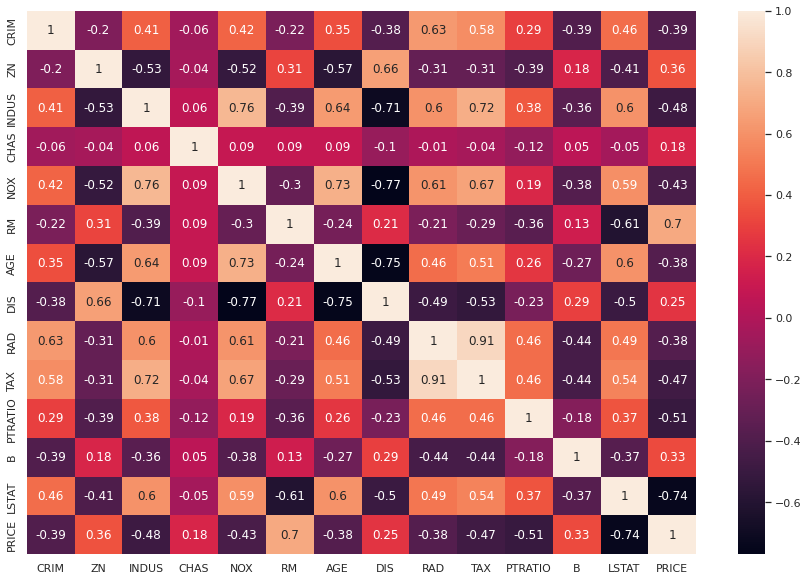

In [ ]:
#Created a dataframe without the price col, since we need to see the correlation between the variables
# bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos.corr().round(2) #상관계수를 계산해줘.
sns.heatmap(data=correlation_matrix, annot=True) #heatmap 관계가 높다는 검은색, 밝은색 -> 진한 색깔이면 관계가 높다. annot->계산한값을 그림에 그려줘.


#다중공산성 문제를 확인한것(왜냐하면 타겟은 빠져있기 때문에.)

In [ ]:
bos.columns

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','DIS']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x=bos[col]
    y = target
    plt.scatter(x, y, marker='o',color='#e35f62')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

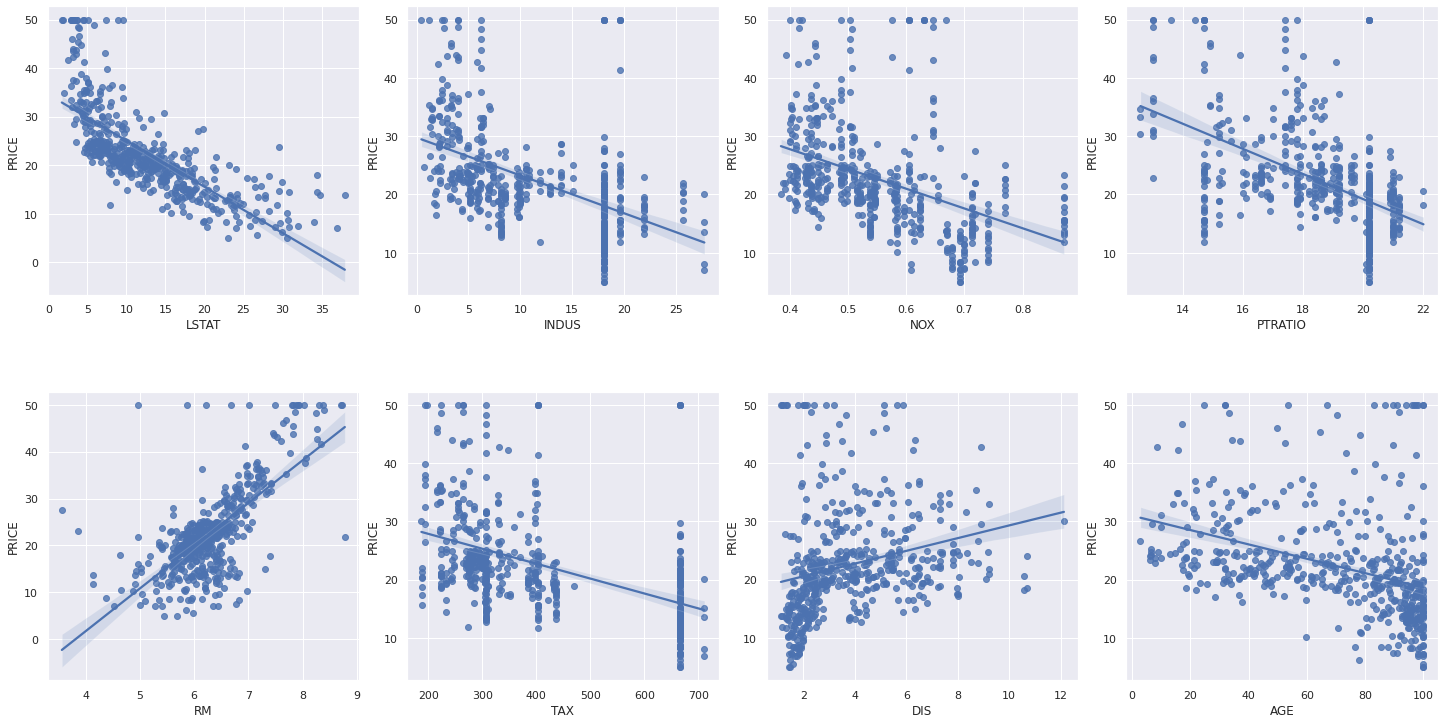

In [ ]:
column_sels = ['LSTAT','INDUS','NOX','PTRATIO','RM','TAX','DIS','AGE']
x = bos.loc[:,column_sels]
y = bos['PRICE']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [26]:
bos.RM.shape

(506,)

In [39]:
bos.PRICE.shape

(506,)

In [40]:
X_rooms = bos.RM
y_price = bos.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [41]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

- Sklearn의 Linear regression 클래스

**input parameter**
- fit_intercept : 불 값으로, default = True. Intercept(절편) 값을 계산할 것인지 말지를 지정함. 만일 False로 지정하면 Intercept가 사용되지 않고 0으로 지정됨.

- normalize : 불 값으로, 디폴트는 False임. fit_intercept가 False 인 경우에는 이 파라미터가 무시됨. 만일 True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 함


**Features**

- coef_ : fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피쳐 개수)

- intercept_ : intercept 값


#다중 공성선 문제(multicollinearity problem)

## 참고 : 선형 회귀분석의 4가지 기본가정(https://kkokkilkon.tistory.com/175)

선형회귀의 가정은 4가지 정도가 있다.

1. 독립변수와 종속변수 간의 선형적인 관계를 가정한다.

2. 오차항은 정규분포를 따른다는 가정이다. (Normality)

3. 오차항은 등분산성을 가정한다.(Homoscedasticity)

4.  공분산성이 없다는 가정이다. (no multicollinearity) 

모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상을 말함.

-> 어처구니 없는 해석을 하게 만듬


- 피쳐 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐. 이러한 현상을 다중 공선성(Multi-collinearity) 


- RMSE(Root Mean Squared Error) :MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다  더 커지는 특성이 있으므로 MSE에 루트를 씌움.


## $R^2 = {\dfrac {예측값 ~~~ Variance} {실제값~~~Varivance} } $


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Train 에 대한 평가
reg_1 = LinearRegression()
reg_1.fit(X_train, Y_train)
# print(reg_1.score(X_train_1,Y_train_1)) # R^2 score

y_train_predict = reg_1.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = round(reg_1.score(X_train, Y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.972277149440585
R2 score is 0.43




In [44]:
# model evaluation for test set

y_pred= reg_1.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
r2 = round(reg_1.score(X_test, Y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




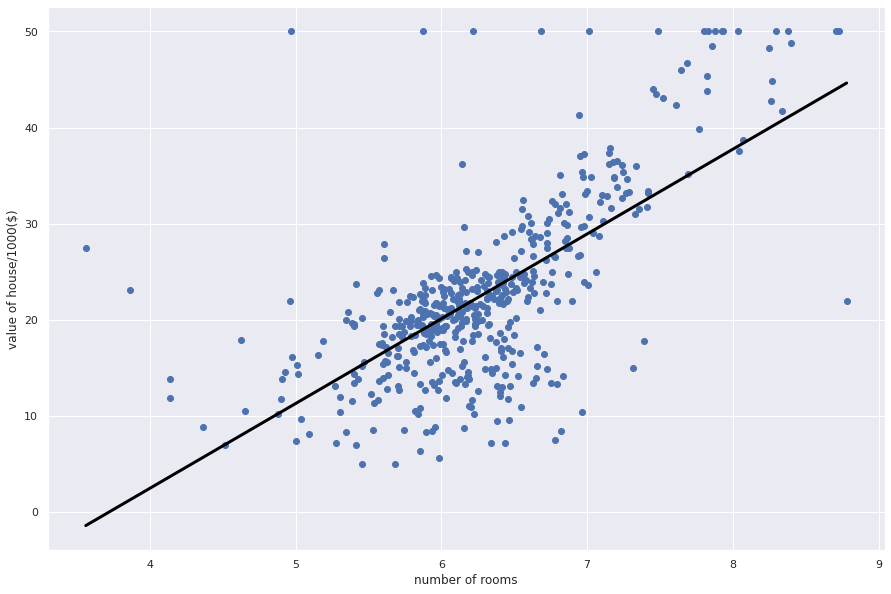

In [45]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()

## Regression Model for All the variables

In [46]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [48]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [49]:
# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




In [50]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665333
R^2: 0.67




In [ ]:
!pip install statsmodels

In [52]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf

In [53]:
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
#변수들에 상수항을 추가함.
X_constant = sm.add_constant(X) 

In [54]:
####요약 통계량 OLS 방법 ->R^2을 이용해도 됨.
model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

In [ ]:
lin_reg.summary()

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

- CRIM : 지역별 점외 발생률
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율
- NDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위차한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000 달러당 재산세율
- PTRATIO : 지역의 교사와 학생 수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
-  MEDV : 본인 소유의 주택가격(중앙값)

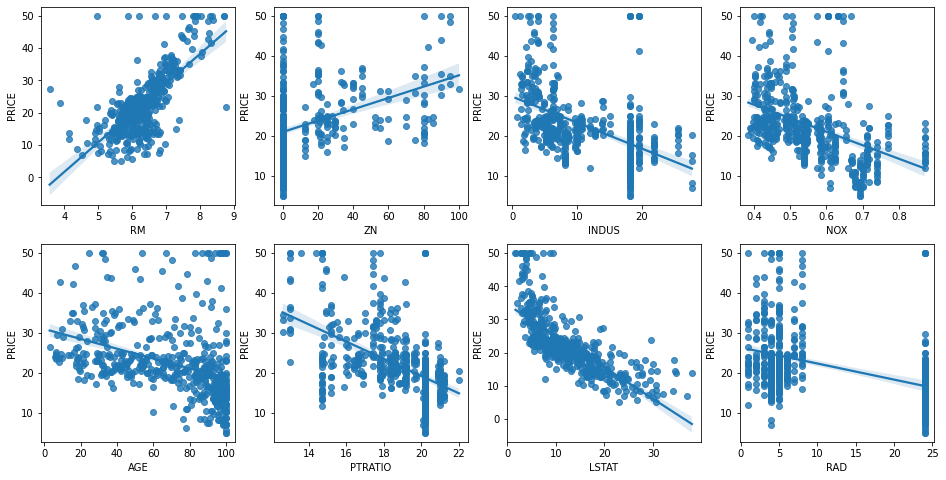

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:
print('절편 값:',lr.intercept_)
print(lr.coef_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216477
[-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### K-fold cross validation
K 겹 교차 검증(Cross validation)이란 통계학에서 모델을 "평가" 하는 한 가지 방법입니다. 소위 hold-out validation 이라 불리는 전체 데이터의 일부를 validation set 으로 사용해 모델 성능을 평가하는 것의 문제는 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성이 떨어지게 된다는 것입니다. 만약 테스트셋을 어떻게 잡느냐에 따라 성능이 다르면, 우연의 효과로 인해 모델 평가 지표에 편향이 생기게 됩니다.



이를 해결하기 위해 K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트레이닝셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. (아래 데이터는 모두 사실은 트레이닝 데이터입니다. Iteration이라는 상황안에서만 테스트셋이 되는 것입니다.) 이 때, 데이터를 몇 개로 쪼갰느냐가 K-겹 교차검증의 K가 됩니다.

<figure>
    <img src='https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E' width=500 height=300>
</figure>



출처: https://3months.tistory.com/321 [Deep Play]

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()


# K-Fold cross validaition 설명 및 그림 붙이기(02/19)?
# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


# 왜 음수로 코딩(02/19)?
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
# 회귀의 값은 작아지면 좋으니깐 마이너스를 취하면 작으면 작아지는게 좋음 (사람마다 다를듯) 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## Polynomial Regression과 오버피팅/언더피팅 이해

### Polynomial Regression 이해

단항 피처 $[x_1, x_2]$를 degree = 2, 즉 2차 다항 피차로 변환한다면?
$(x_1+x_2)^2$의 식 전개에 대응되는 $[1,x_1,x_2,x_1x_2,x_1^2,x_2^2]$의 다항 피처들로 변환

1차 단항 피처들의 값이 $[x_1, x_2] = [0,1]$ 일 경우

2차 다항 피처들의 $[1,x_1=0,x_2=1,x_1^2=0,x_1x_2=0,x_2^2=1]$형태인  [1,0,1,0,0,1]로 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
#poly_ftr =poly.fit_transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


- If you have features [a, b, c] the default polynomial features(in sklearn the degree is 2) should be [1, a, b, c, a^2, b^2, c^2, ab, bc, ca].

In [ ]:
 #3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)


3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#####################################
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


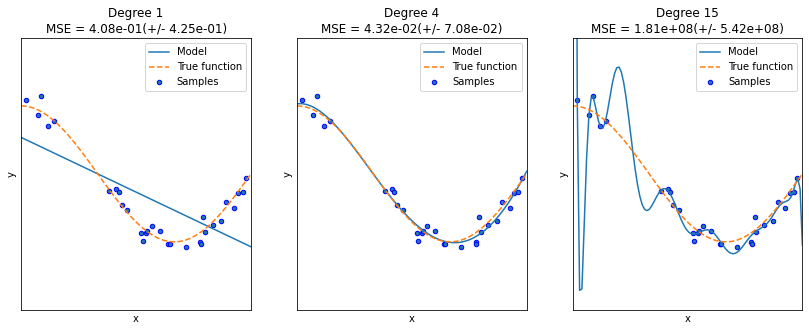

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. / 다항회귀의 단점 : 오버피팅되기가 매우 쉬움
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    # include_bias : y절편을 넣을것인가?
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression

- Lagrange multiplier

In [ ]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge # Linear regression+Ridge(norm)^2
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


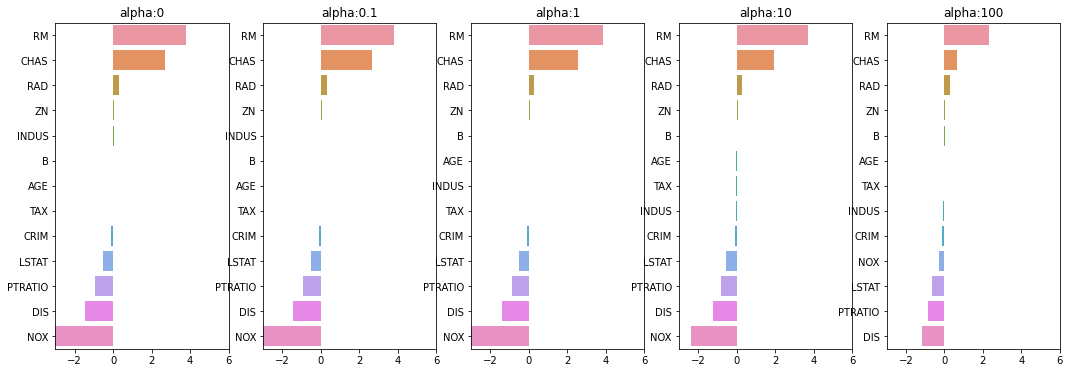

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': 
          model = Ridge(alpha=param)
        elif model_name =='Lasso': 
          model = Lasso(alpha=param)
        elif model_name =='ElasticNet': 
          model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
 #라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
coeff_Ridge_df = get_linear_reg_eval('Ridge',params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 
#######  Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589 


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures


#standardSclaer: mean 0 var 1로 scaler
#MinMax : Min Max로만 Scaler

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
# Robust scaler : 이상치 덜 민감함 
# Robust sclaer : (X-mean) / (X_75% - X_25%)
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)
    
    print(get_linear_reg_eval)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
<function get_linear_reg_eval at 0x7f4118bad7a0>

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
<function get_linear_reg_eval at 0x7f4118bad7a0>

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
<function get_linear_reg_eval at 0x7f4118bad7a0>

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
<function get_linear_reg_eval at 0x7f4118bad7a0>

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 1009, in fit
    y_numeric=True,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/valida

## 데이터 셋: kaggle titanic(https://www.kaggle.com/c/titanic)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -1ha /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [ ]:
!mkdir -p ~/.kaggle # making dictory
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/ #!mv(move)
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         46           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         52           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        589           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge         89           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1212           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14331            True  


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 19.0MB/s]


In [ ]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

# 탐색적 자료 분석(Exploratory Data Analysis(EDA)


 - survived : 생존=1, 죽음=0
 - pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
 - sibsp : 함께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown


In [ ]:
train.head() #default = 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [ ]:
train.isnull().sum()
# # train.isna().sum()
# train.isnull().sum().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 문제? 연속형? 범주형

-> 범주형에 대한 feature에 대한 막대차트

1. Pclass
2. sex
3. sibsp
4. parch
5. embarked
6.cabin


In [ ]:
train['Survived'] ==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
train[train['Survived']==1]['Sex']

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [ ]:
train[train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [ ]:
train[train['Survived'] ==1]['Sex'] # train['Survived'] ==1 ->True,False ->train[Trus,False]['Sex']->0->femele,1->male

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [ ]:
train['Sex']=='Female'

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [ ]:
def bar_chart(feature):
  survived = train[train['Survived'] ==1][feature].value_counts() # 생존자를 카운트
  dead = train[train['Survived'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) #[생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

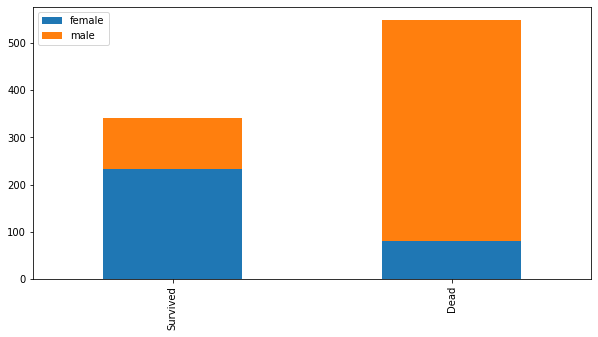

In [ ]:
bar_chart('Sex') #무슨 이유로 남성분들이 사망을 하셨을까?

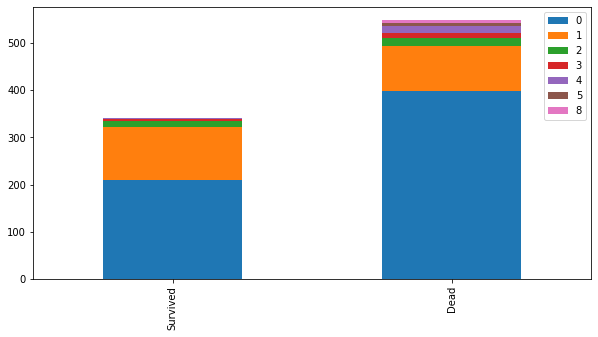

In [ ]:
bar_chart('SibSp') # 함께 탑승한 형제 또는 배우자 수 에 따라서 생존이 왜 다르지?

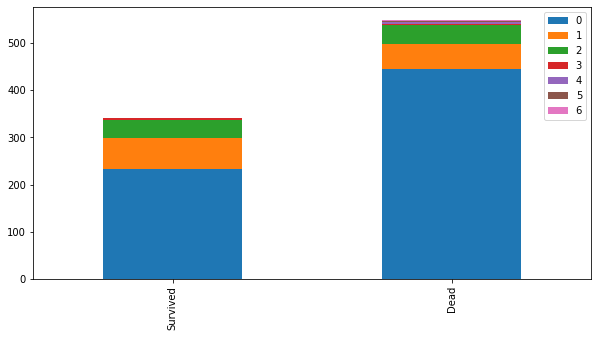

In [ ]:
bar_chart('Parch')

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
train.drop('Name',axis = 1, inplace = True)
test.drop('Name',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
train.drop('Ticket',axis = 1, inplace = True)
test.drop('Ticket',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
train.drop('Cabin',axis = 1, inplace = True)
test.drop('Cabin',axis = 1, inplace = True)

In [ ]:
#원핫인코딩이 힘들어서 우선 포기
train.drop('Embarked',axis = 1, inplace = True)
test.drop('Embarked',axis = 1, inplace = True)

In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Name'].str

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.', expand = False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
train_test_data = [train,test]
# Name에 따라서 뭐가 다른가? ->전에 각각 해당하는 value를 count를 함.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand = False)
#extract('([A-Za-z]+)\. ->정규표현식
# A-Z와 a-Z를 찾아서 어느지점에서 끝내는가? .을 기준으로 해서 자르라는 이야기 그 다음에 count

In [ ]:
train['Title'].value_counts() 

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

# one-hot encoding을 합니다.

In [ ]:
# 극단적으로 나눔.
title_mapping = {'Mr':0, "Miss":1, 'Mrs':2,'Master':3,
                 'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Ms':3,'Sir':3,'Don':3,'Countess':3,
                 'Capt':3,'Lady':3,'Jonkheer':3,'Mme':3}
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping) #모든 피쳐에 적용해주세요!

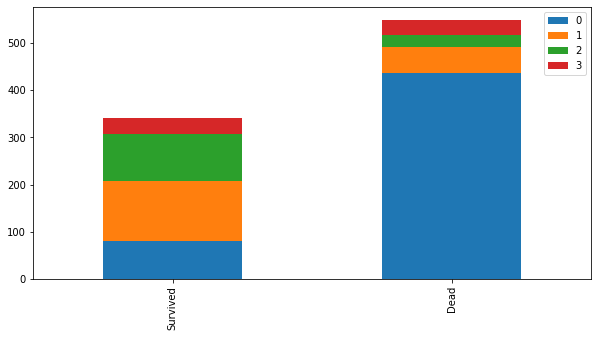

In [ ]:
bar_chart('Title')

In [ ]:
sex_mapping = {'male':0,'female':1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)
# method : from sklearn.preprocessing import OneHotEncoder, pandas의 get_dummies

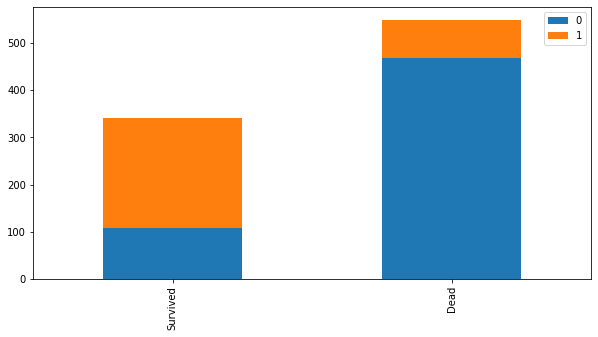

In [ ]:
bar_chart('Sex')

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
train.groupby('Title')['Age'].head()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
14     14.0
15     55.0
16      2.0
22     15.0
30     40.0
50      7.0
59     11.0
63      4.0
149    42.0
150    51.0
245    44.0
249    54.0
317    54.0
369    24.0
398    23.0
443    28.0
449    52.0
536    45.0
556    48.0
599    49.0
626    57.0
632    32.0
641    24.0
647    56.0
660    50.0
694    60.0
710    24.0
745    70.0
759    33.0
822    38.0
848    28.0
Name: Age, dtype: float64

In [ ]:
#missing Age를 각 Title에 대한 연령의 중간값으로 채움(Mr,Mrs,Miss,others) inplace 는 채울꺼냐?
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace = True)

test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace = True)

In [ ]:
train['Age'].isna().sum()

0

In [ ]:
train[['Title','Age']].groupby(['Title'],as_index = False).mean()

,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.642857
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.466750
9,Miss,21.620879


In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- 가설 2) 사망자의 나이가 어떻게 될까? +생존자

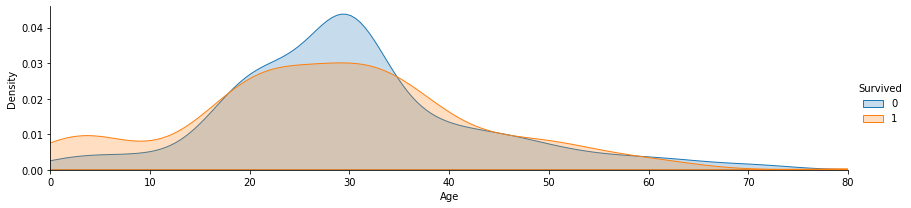

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때 유용함
# FeactGrid는 Colum,row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함.
#aspect : subplot의 세로 대비 가로의 비율.
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()
#20-30대에 사망률 > 생존률이 높다 왜 그럴까?

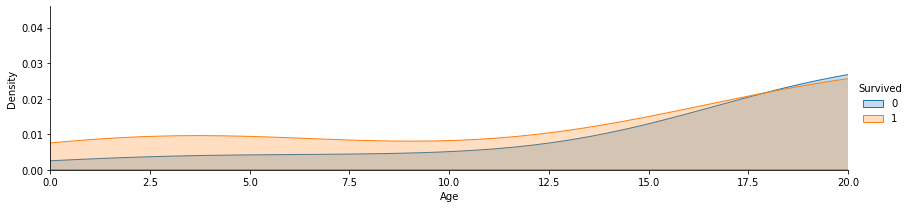

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

plt.show()
#0-20까지 나이로 자름.

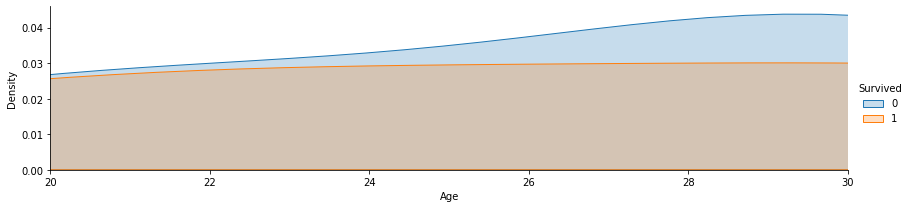

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.xlim(20,30)

plt.show()
#20-30으로 나이를 자름.

0~80세까지 들어있음. 너무 많다. Pandas ->Binning 기술을 씀 (연속형 변수를 특정한 구간으로 잘라서 범주형으로 만들어주는 기술)

잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐 각각 하나의 카테고리에 나이를 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <=16, 'Age']=0,
  dataset.loc[ ((dataset['Age'] >16) and  (dataset['Age'] <=26)),'Age']=1

ValueError: ignored

#컴마로 연결을 해버리니깐, multi index로 받아들여서 동시에 처리가 안됨

In [ ]:
for dataset in train_test_data: 
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0 
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1 
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2 
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3 
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 
  dataset['Age'] = dataset['Age'].map( { 0: 'Child', 1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [ ]:
train2= train.copy()
train2.loc[(train2.Age<=16),"Age_bin"]=0
train2.loc[(train2.Age>16) & (train2.Age<=26),"Age_bin"]=1
train2.loc[(train2.Age>26) & (train2.Age<=36),"Age_bin"]=2
train2.loc[(train2.Age>36) & (train2.Age<=46),"Age_bin"]=3
train2.loc[(train2.Age>46),"Age_bin"]=4
train2

Test2= train.copy()
Test2.loc[(train2.Age<=16),"Age_bin"]=0
Test2.loc[(train2.Age>16) & (train2.Age<=26),"Age_bin"]=1
Test2.loc[(train2.Age>26) & (train2.Age<=36),"Age_bin"]=2
Test2.loc[(train2.Age>36) & (train2.Age<=46),"Age_bin"]=3
Test2.loc[(train2.Age>46),"Age_bin"]=4
Test2


TypeError: ignored

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Young,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,Young,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,Young,0,0,111369,30.0000,C148,C,Mr


In [ ]:
def bar_chart2(feature):
  survived = train[train['Survived'] ==1][feature].value_counts() # 생존자를 카운트
  dead = train[train['Survived'] ==0][feature].value_counts() #사망자를 카운트
  df = pd.DataFrame([survived,dead]) #[생존자,사망자]를 dataFrame
  df.index = ['Survived','Dead'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

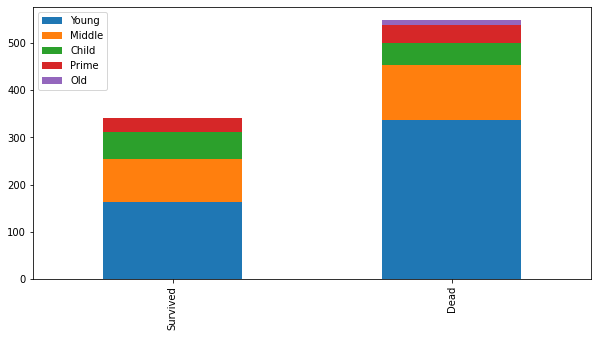

In [ ]:
bar_chart2('Age')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,Mr


#Embarked

In [ ]:
train2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

# FamilySize
함께 동승한 부모님과 아리들의 수화 형제와 배우자의 수

혼자탄거랑 가족들이랑 탄건랑 어떻게 다른지?

Sibsp+parch

In [ ]:
train['FamilySize'] = train['SibSp']+train['Parch']+1
test['FamilySize'] = test['SibSp']+test['Parch']+1
#솔로일 가능성이 있기 때문에 1을 더해줌. 왜냐하면 파이썬은 0부터 숫자를 세기 때문에

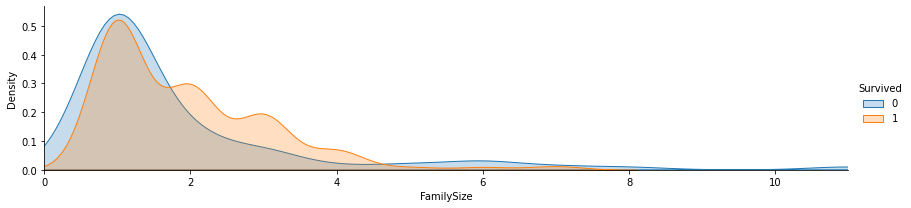

In [ ]:
facet = sns.FacetGrid(train, hue ='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

plt.show()

# 혼자일경우는 사망률,생존률이 높음

In [ ]:
X_train = train.drop(['Survived','PassengerId'],axis=1)
Y_train = train['Survived']
X_test = test.drop('PassengerId',axis = 1).copy()

In [ ]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Braund, Mr. Owen Harris",0,Young,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Middle,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,"Heikkinen, Miss. Laina",1,Young,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Middle,1,0,113803,53.1000,C123,S,Mrs,2
4,3,"Allen, Mr. William Henry",0,Middle,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,Young,0,0,211536,13.0000,NaN,S,Rev,1
887,1,"Graham, Miss. Margaret Edith",1,Young,0,0,112053,30.0000,B42,S,Miss,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,Young,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,1,"Behr, Mr. Karl Howell",0,Young,0,0,111369,30.0000,C148,C,Mr,1


In [ ]:
X_test['Fare'].fillna(0,inplace = True)
X_test['Title'].fillna(0,inplace = True)
#Test에 대해서도 결측치가 있자만 강제로 0을 할당.

In [ ]:
X_test.isna().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
# 데이터가 정렬되어있을 경우도 있기 때문에 데이터를 shuffle 해줌
from sklearn.utils import shuffle


lig_reg = LinearRegression()
lig_reg.fit(X_train,Y_train)

lig_reg.score(X_train,Y_train)


ValueError: ignored

In [ ]:
Y_pred = lig_reg.predict(X_test)

ValueError: ignored

In [ ]:
df1 = pd.DataFrame(Y_pred)

NameError: ignored

In [ ]:
# import pandas as pt
# df1.to_csv('test1.csv')

# 캐글 API이용하여 데이터 다운로드

!pip install kaggle --upgrade

Kaggle API 다운로드(.json 파일)


참고 : https://medium.com/hyunjulie/%EC%BA%90%EA%B8%80%EA%B3%BC-%EA%B5%AC%EA%B8%80-colab-%EC%97%B0%EA%B2%B0%ED%95%B4%EC%A3%BC%EA%B8%B0-6a274f6de81d


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json #json이 있니?

In [ ]:
!mkdir -p ~/.kaggle #mkdir ->making dict
!cp kaggle.json ~/.kaggle/ #!mv =!cp  ~/. -> 숨김폴더
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json #그 권한을 풀어주세요.
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

In [ ]:
!kaggle competitions download -c bike-sharing-demand

# 회귀분석 실습 2
## 공공 자전거 수요 예측(Bike Sharing Demand)

###https://www.kaggle.com/c/bike-sharing-demand/overview

 - 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를 
  
  기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.
  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지
  - 데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.


### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [ ]:
def funName(x:str,y:float=6.5)->int:
    return x+y

In [ ]:
import calendar
import numpy as np #선형대수학 패키지
import pandas as pd #dataframe처리
# from pandas.core.frame import DataFrame
# from pandas.core.series import Series
import seaborn as sns #통계적 plot
from scipy import stats #통계 
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt #plot
import warnings #에러는 아닌데, 주의하는게 뜨는것들을 방지
# pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
# %matplotlib inline

df_train = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/bike-sharing-demand/test.csv')

In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
df_train.shape,df_test.shape

((10886, 12), (6493, 9))

In [ ]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

#feature engineerings

In [ ]:
df_train.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
df_train["date"] = df_train.datetime.apply(lambda x : x.split()[0])
df_train["hour"] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [ ]:
df_train['date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

카테고리 유형으로 강제 변환

In [ ]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    df_train[var] = df_train[var].astype("category")

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


colum drop

In [ ]:
# df_train = df_train.drop(['datetime'],axis=1,inplace = False)

타입 확인 결과 날짜 데이터가 object 타입.

날짜 데이터를 보다 쉽게 조회하기 위해 datetime으로 변경 함

시계열데이터에 slicing이 가능하게 함


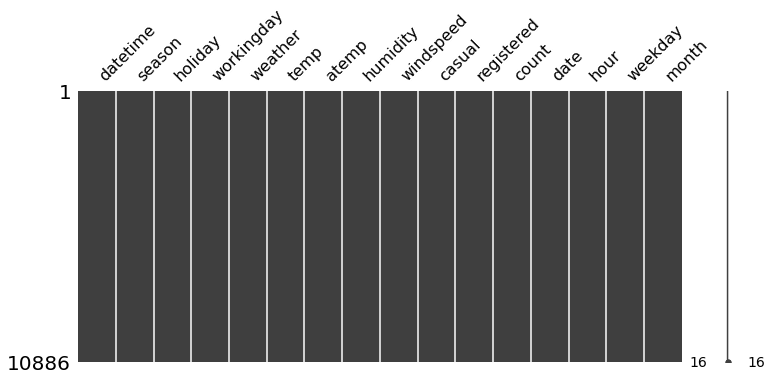

In [ ]:
import missingno as msno #결측치 보는 plot
msno.matrix(df_train,figsize=(12,5))

In [ ]:
df_train_1 = df_train.copy() 
df_test_1 = df_test.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime']) #drop안했음.
#슬라이싱이 가능하게 datetime구조로 바꿈.
df_train_1.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
date                  object
hour                category
weekday             category
month               category
dtype: object

In [ ]:
df_train_1.isna().sum()
#df_train_1.isnull().sum

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

날짜라는 시계열이기 때문에 선형회귀는 불가

왜냐하면, 선형회귀는 정수형 혹은 실수형 데이터만 다루기 때문에

날짜 데이터를 정수형태로 변환하고 새로운 feature를 생성

In [ ]:
df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second
#요일 데이터 -일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Hour rental amount')]

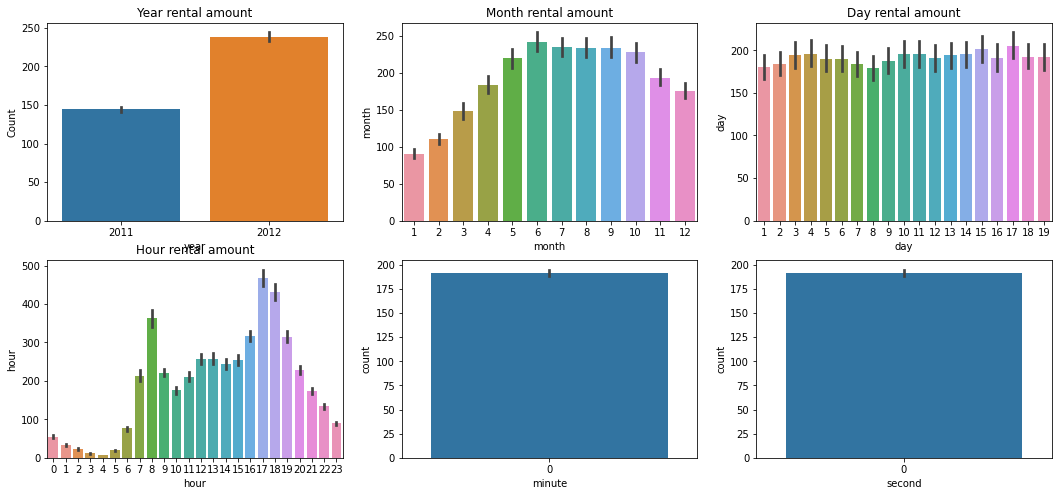

In [ ]:
figure, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df_train_1, x="year", y="count", ax=ax1)
sns.barplot(data=df_train_1, x="month", y="count", ax=ax2)
sns.barplot(data=df_train_1, x="day", y="count", ax=ax3)
sns.barplot(data=df_train_1, x="hour", y="count", ax=ax4)
sns.barplot(data=df_train_1, x="minute", y="count", ax=ax5)
sns.barplot(data=df_train_1, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count', title ="Year rental amount")
ax2.set(ylabel='month', title ="Month rental amount")
ax3.set(ylabel='day', title ="Day rental amount")
ax4.set(ylabel='hour', title ="Hour rental amount")

#Day는 분석하면 안됨.-> 달마다 요일이 달라서 카운트 다 다릅니다->지표가 달라짐->분석모델 X

Month rental amount을 보면, 겨울로 분리되는 12월의 경우 초봄인 3~4월의 대여량과 비슷하다는 점이었다. 워싱턴의 날씨 변화는 우리나라의 사계절과 비슷하다. (여기서 알수 있는 점은 계절의 영향은 별로 없구나)

또한 hour 파트에서 아침7시와 저녁 6~7시의 수요량이 다른 시간대들과 비교했을 때 굉장히 높은 것을 알 수 있다. 이는 출퇴근길에 자전거를 많이 이용하는 사람들이 많다고 예측해 볼 수 있다. (주말과 나눠서 보는 것이 필요하다.) 혹시라도 뭐가 다를지 모르겠어서

일별 대여량은 1일부터 19일까지만 있고 나머지 날짜의 경우는 test데이터에 들어가있다. 따라서 이 변수는 피쳐로 사용하면 안 된다!

### Quantile, Quartile, Percentile 개념 정리

- 참고 : https://eunsukimme.github.io/data%20science/2019/11/01/Quantile/

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

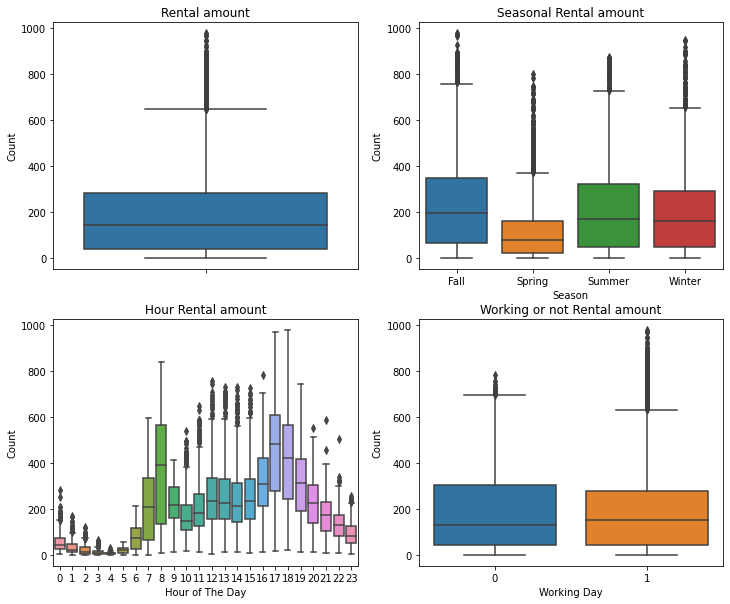

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=df_train_1, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=df_train_1, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=df_train_1, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")


#이상치가 너무 많음 ->이상치 처리를 해줘야 겠구나!

위 그래프를 보면 대여량은 특정 기간에 머물러 있고 특히 근무일이 아닐 때 대여량이 더 많은 것을 알 수 있다.

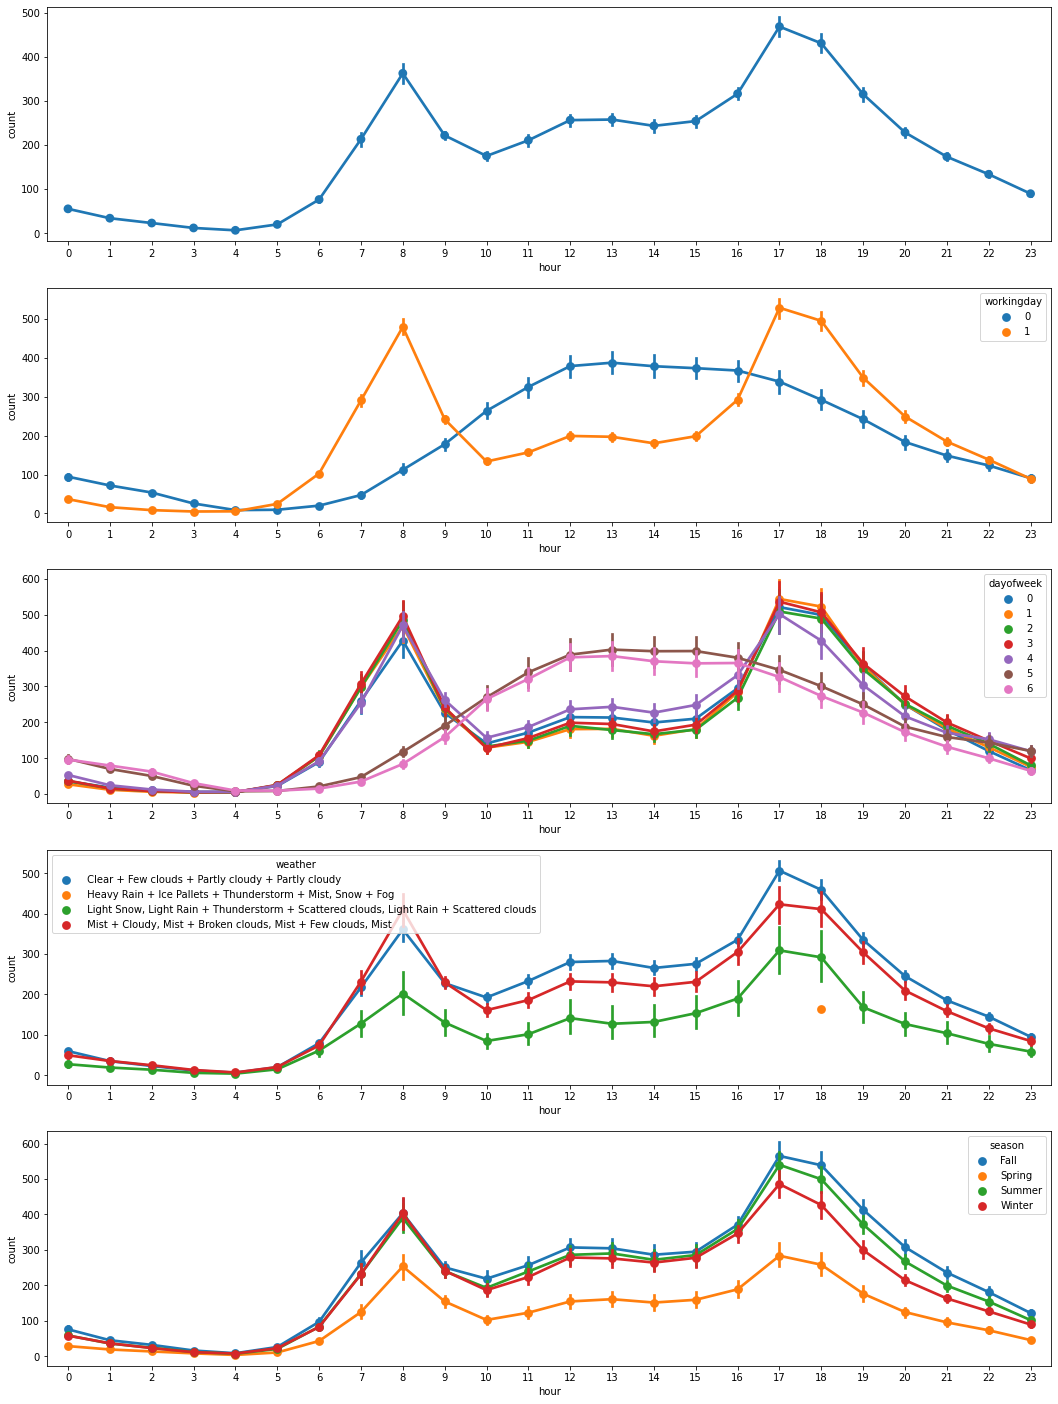

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

#꺽은선 그래프.
sns.pointplot(data=df_train_1, x="hour",y="count",ax=ax1)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="workingday",ax=ax2)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="dayofweek",ax=ax3)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="weather",ax=ax4)

sns.pointplot(data=df_train_1, x="hour",y="count", hue="season",ax=ax5)

#꺽은선을 그래프를 본 결과는 출퇴근시간에 많긴 많다!

In [ ]:
# corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count"]]
#상관 계수 측정
corrMatt = df_train_1.corr()
print(corrMatt)
mask =np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False #상삼각행렬 False ->하삼각행렬

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   
hour        0.145430  0.140343 -0.278011   0.146631  0.302045    0.380540   
month       0.257589  0.264173  0.204537  -0.150192  0.092722    0.169451   
year        0.061226  0.058540 -0.078606  -0.015221  0.145241    0.264265   
day         0.015551  0.011866 -0.011335   0.036157  0.014109    0.019111   
minute           NaN       NaN       NaN        NaN       NaN         NaN   

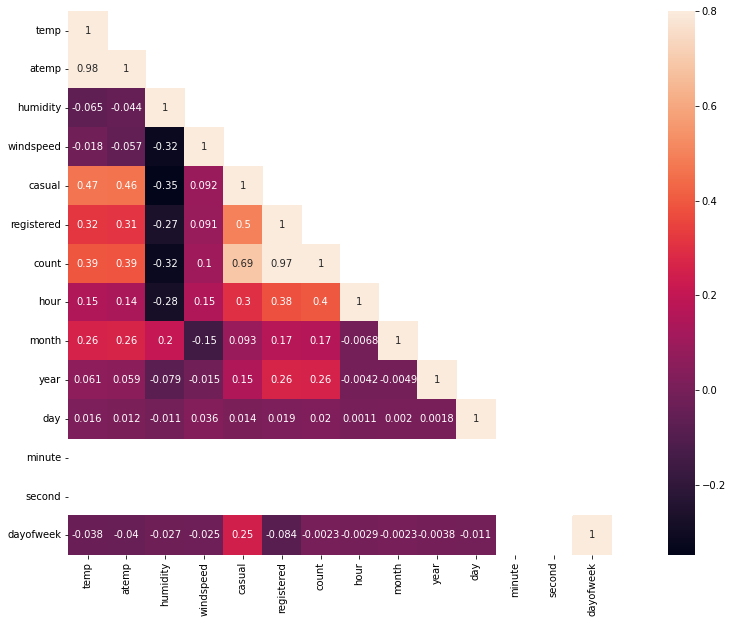

In [ ]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8,square= True, annot=True)

1. temp, humidity, windspeed는 상관관계가 거의 없다.
2. registered, casual는 상관관계가 높다!
3. atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피쳐로 사용하기에 적합하지 않을 수 있다.

#regplot으로 산점도 plot을 그림

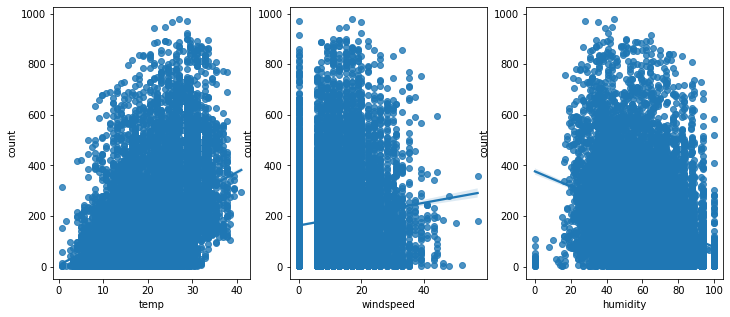

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=df_train_1, ax=ax1)
sns.regplot(x="windspeed",y="count",data=df_train_1, ax=ax2)
sns.regplot(x="humidity",y="count",data=df_train_1, ax=ax3)

# temp,windspeed,humidity -> 회귀로 절대로 못맞침(상관계수가 낮음->sctter->drop 하는것이 좋지 않을까? ->항상 좋을까? ->실험적이여야 함.)

windspeed의 경우 0에 숫자가 몰려 있는 것으로 보아, 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측한다. 

In [ ]:
# 월별 데이터 모아보기
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
df_train_1["year_month"] = df_train_1["datetime"].apply(concatenate_year_month)
print(df_train_1.shape)
df_train_1[["datetime", "year_month"]].head()

(10886, 22)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


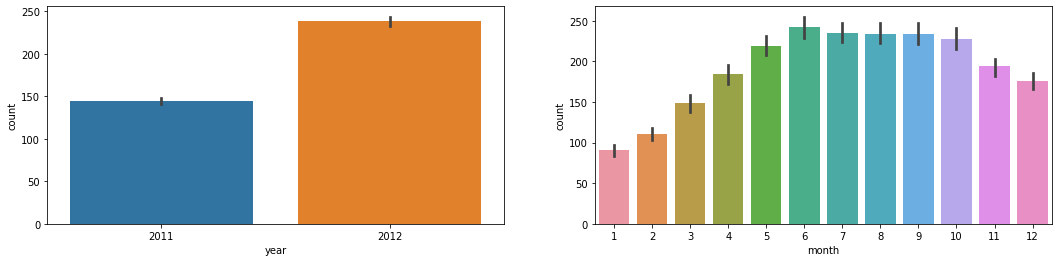

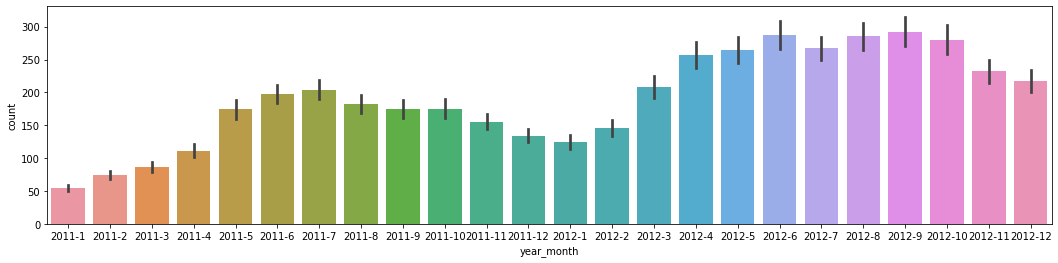

In [ ]:
fig, (ax1, ax2) =plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=df_train_1, x="year",y="count",ax=ax1)
sns.barplot(data=df_train_1, x="month",y="count",ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=df_train_1, x="year_month",y="count",ax=ax3)

분석 결과 : 2011년보다 2012년에 대여량이 더 많다. ->달로 나눠도 증가하고 있습니다.

#이상치 처리

##방법1) IQR(Interquartile Range)  = Q3(75%)-Q1(25%)

$Q1-1.5*IQR ~:~$ 최소 제한선


$Q3 + 1.5*IQR ~:~$   최대 제한선



범위를 좀 더 조정

In [ ]:
# 'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df_train_1['count'], 25)
count_q1

# 'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df_train_1['count'], 75)
count_q3

# IQR = Q3 - Q1
count_IQR = count_q3 - count_q1
count_IQR
# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_train_1_IQR = df_train_1[(df_train_1['count'] >= (count_q1 - (1.5 * count_IQR))) & 
                            (df_train_1['count'] <= (count_q3 + (1.5 * count_IQR)))]
print(df_train_1_IQR)
#약 300개정도 잃어버림

                 datetime  season holiday workingday  \
0     2011-01-01 00:00:00  Spring       0          0   
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

## 방법2) 3-sigma, 평균 $\pm$ 3* 표준편차차

In [ ]:
df_train_1_sigma = df_train_1[np.abs(df_train_1["count"] - df_train_1["count"].mean()) <= (3*df_train_1["count"].std())]
print(df_train_1_sigma)

#약 100개정도 잃어버림

                 datetime  season holiday workingday  \
0     2011-01-01 00:00:00  Spring       0          0   
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp  \
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395   
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

#IQR을 적용했을 떄의 그림

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

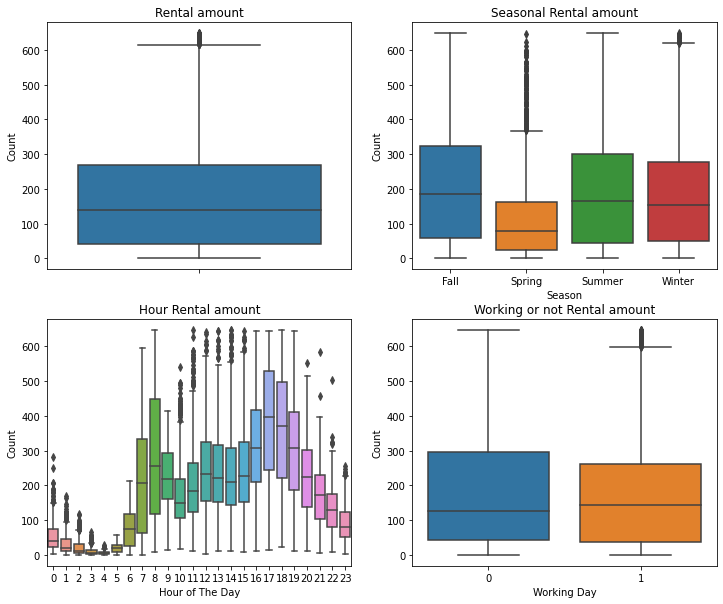

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1_IQR, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=df_train_1_IQR, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=df_train_1_IQR, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=df_train_1_IQR, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")

#3-sigma를 적용하였을 때

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Working or not Rental amount')]

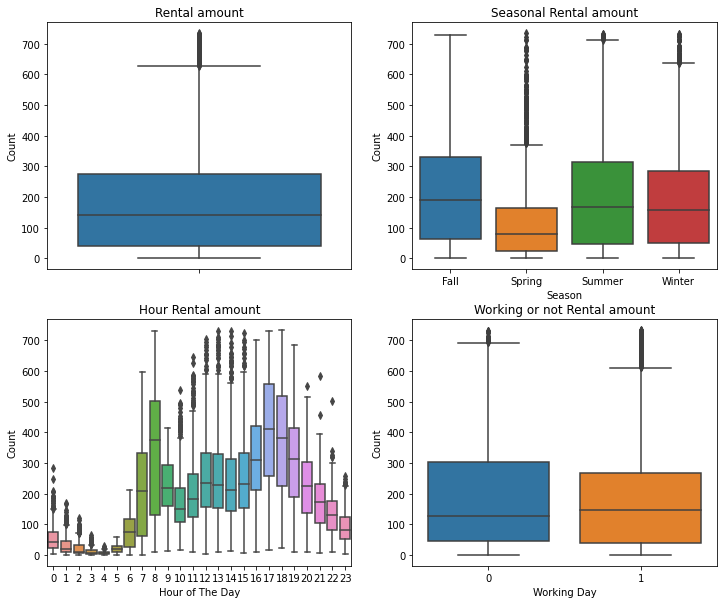

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df_train_1_sigma, y="count", orient= "v", ax=axes[0][0])
sns.boxplot(data=df_train_1_sigma, y="count", x = "season",orient= "v", ax=axes[0][1])
sns.boxplot(data=df_train_1_sigma, y="count", x="hour",orient= "v", ax=axes[1][0])
sns.boxplot(data=df_train_1_sigma, y="count", x="workingday",orient= "v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Rental amount")
axes[0][1].set(xlabel='Season',ylabel='Count',title="Seasonal Rental amount")
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count',title="Hour Rental amount")
axes[1][1].set(xlabel='Working Day',ylabel='Count',title="Working or not Rental amount")

선형회귀에서는 datetime 타입의 데이터를 사용할 수 없음

따라서 날짜 데이터를 숫자형 데이터타입으로 변환

In [ ]:
#datetime -> integer 타입으로 변환하는 custom fun
def to_integer(datetime):
  return 10000*datetime.year +100*datetime.month+datetime.day

#데이터 타입 변경
df_train_1_IQR_int = df_train_1_IQR['datetime'].apply(lambda x: to_integer(x))
df_train_1_IQR['datetime'] = pd.Series(df_train_1_IQR_int)

In [ ]:
df_train_1_IQR

# 모델 적용

In [ ]:
dataTrain = pd.read_csv("/content/drive/MyDrive/bike-sharing-demand/train.csv")
dataTest = pd.read_csv("/content/drive/MyDrive/bike-sharing-demand/test.csv")

In [ ]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


Feature Engineering

In [ ]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

데이터 변환

In [ ]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [ ]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

Splitting Train And Test Data

In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [ ]:
dataTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0,2012-12-19,19,2012,2,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0,2012-12-19,20,2012,2,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0,2012-12-19,21,2012,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0,2012-12-19,22,2012,2,12


Dropping Unncessary Variables

In [ ]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

RMSLE Scorer

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour) 
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [ ]:
np.log(np.NaN)

nan

In [ ]:
np.nan_to_num(np.log(np.exp(np.NaN)))

0.0

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None #SettingWithCopyError
warnings.filterwarnings("ignore", category=DeprecationWarning) #폐지된 기능에 대한 경고의 베이스 범주

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9778188829547171


Regularization Model - Ridge

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9778188678218579
CPU times: user 3.27 s, sys: 2.5 s, total: 5.77 s
Wall time: 6.15 s


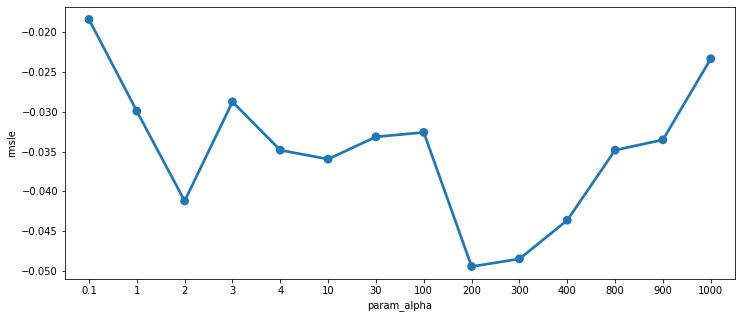

In [ ]:
%%time
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

Regularization Model - Lasso

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9779547810914248


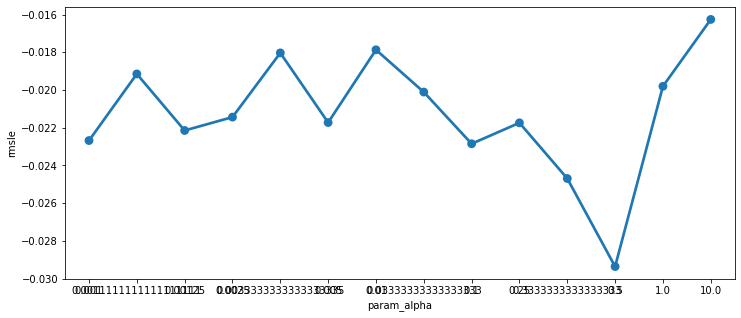

In [ ]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

#HW : 중고차 예측 문제(https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm


In [ ]:
data_vw = pd.read_csv('/content/drive/MyDrive/중고차 예측 문제/vw.csv')
print(data_vw.shape)

(15157, 9)


In [ ]:
data_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [ ]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


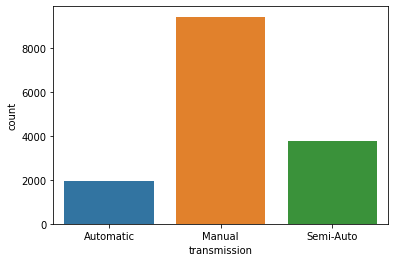

In [ ]:
sns.countplot(data_vw['transmission'])

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Fox                0.000264
 Caddy Maxi         0.000264
Name: model, dtype: float64


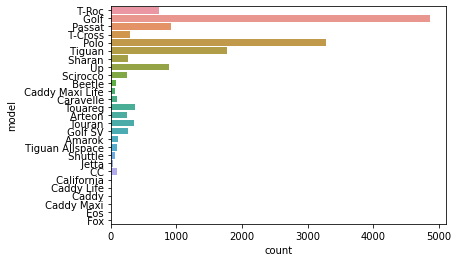

In [ ]:
print(data_vw['model'].value_counts() / len(data_vw)) #정규화 작업.
sns.countplot(y = data_vw["model"])

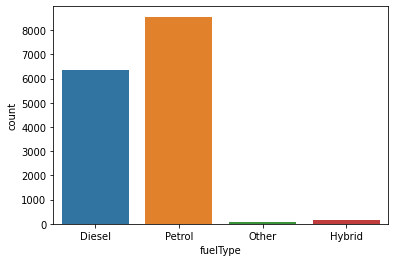

In [ ]:
sns.countplot(data_vw['fuelType'])

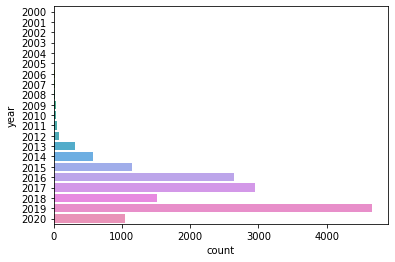

In [ ]:
sns.countplot(y = data_vw['year'])

#데이터가 2020년 특정 월에 끊겼는지? 아니면 2020년도에 진짜 작은거지? (확인 불가)

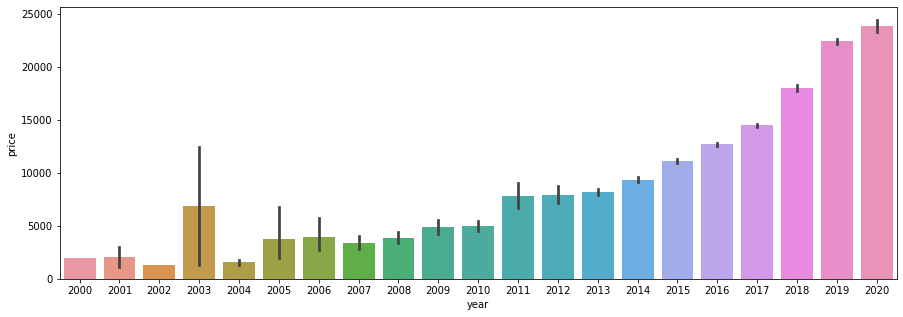

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_vw['year'], y = data_vw['price'])

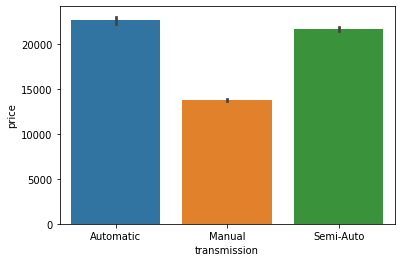

In [ ]:
sns.barplot(x = data_vw["transmission"], y = data_vw["price"])

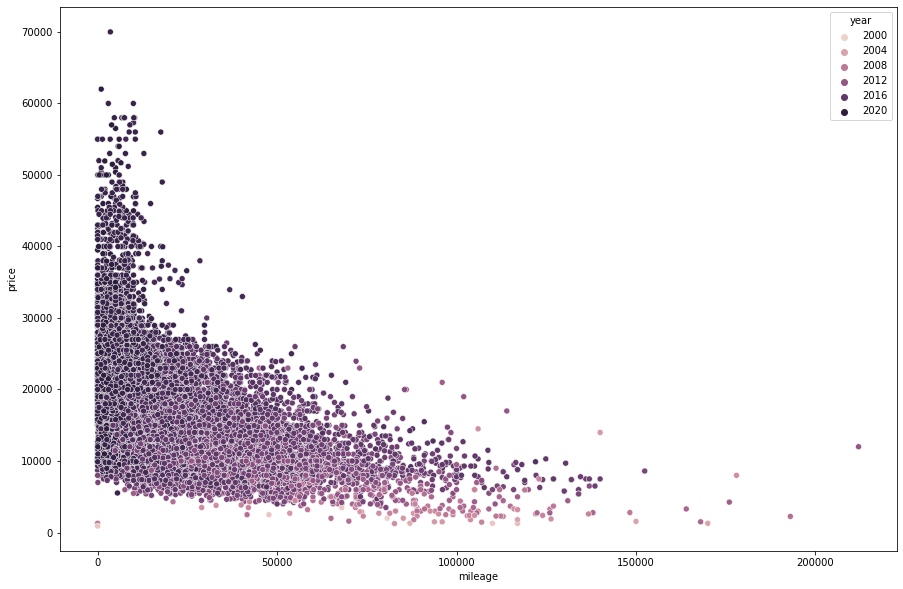

In [ ]:
plt.figure(figsize=(15,10),facecolor='w') #facecolor : 배경색
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["year"])

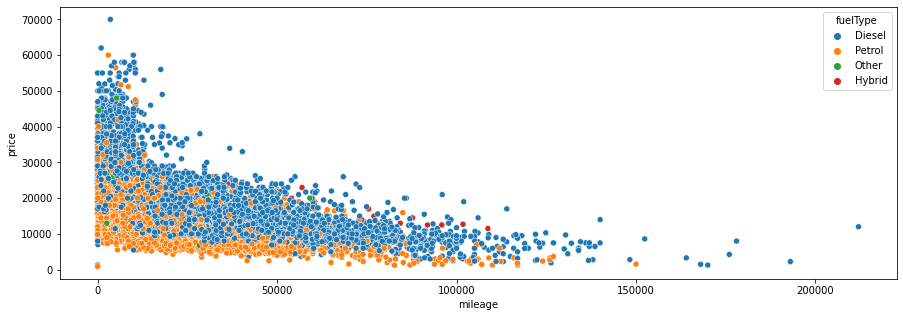

In [ ]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(data_vw["mileage"], data_vw["price"], hue = data_vw["fuelType"])

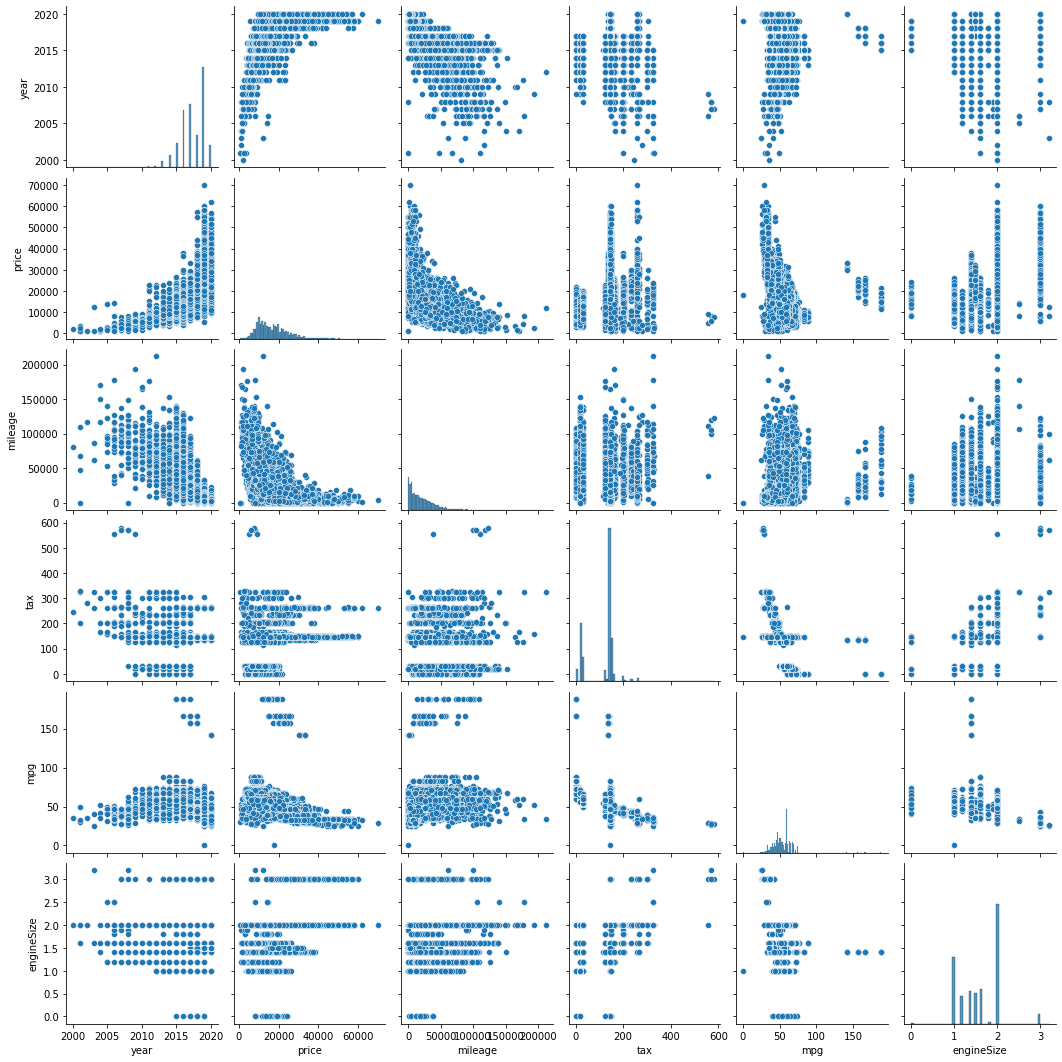

In [ ]:
sns.pairplot(data_vw)

In [ ]:
data_vw["age_of_car"] = 2020 - data_vw["year"] #얼마나 오래되었는지?
data_vw = data_vw.drop(columns = ["year"])
data_vw.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
7535,Polo,12850,Semi-Auto,14030,Petrol,145,60.1,1.2,3
3074,Golf,19200,Semi-Auto,100,Petrol,150,43.5,1.5,1
6893,Polo,6298,Manual,29369,Petrol,125,51.4,1.2,7
14521,Golf SV,10798,Manual,16107,Diesel,0,72.4,1.6,4
11865,Sharan,19500,Semi-Auto,28000,Diesel,145,54.3,2.0,3
6422,Passat,20290,Manual,6269,Diesel,145,57.7,2.0,1
3299,Golf,13490,Manual,24317,Petrol,150,54.3,1.4,3
967,Golf,13695,Semi-Auto,19292,Diesel,20,58.9,1.6,4
7611,Polo,15498,Manual,1267,Petrol,150,49.6,1.0,1
3833,Golf,28490,Semi-Auto,7518,Petrol,150,37.7,2.0,1


## Pre-processing for modeling

In [ ]:
data_vw_expanded = pd.get_dummies(data_vw)
data_vw_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
std = StandardScaler() #값이 중구난방이기 때문에 정규화를 해줌.
data_vw_expanded_std = std.fit_transform(data_vw_expanded) #transform으로 적용을 해줌.
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns) #dataFrame화 하는게->행,열 접근 용이하기 위해서.
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()

(15157, 40)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,model_ Caddy Life,model_ Caddy Maxi,model_ Caddy Maxi Life,model_ California,model_ Caravelle,model_ Eos,model_ Fox,model_ Golf,model_ Golf SV,model_ Jetta,model_ Passat,model_ Polo,model_ Scirocco,model_ Sharan,model_ Shuttle,model_ T-Cross,model_ T-Roc,model_ Tiguan,model_ Tiguan Allspace,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,-0.0199,-0.02298,-0.016247,-0.062512,-0.031474,-0.081904,-0.021495,-0.016247,-0.687322,-0.134164,-0.045997,-0.253469,-0.526229,-0.127378,-0.13211,-0.063567,-0.1421,4.435993,-0.363036,-0.077718,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_vw_expanded_std.drop(columns = ['price']), data_vw_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11367, 39)
(3790, 39)
(11367, 1)
(3790, 1)


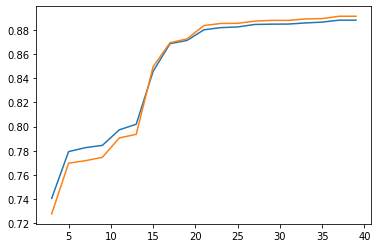

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
#SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다
# f_regression 참고 : (https://woolulu.tistory.com/63)
#Linear model for testing the individual effect of each of many regressors. 
#This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

column_names = data_vw_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [ ]:
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ California', 'model_ Caravelle', 'model_ Polo',
       'model_ Sharan', 'model_ Shuttle', 'model_ T-Roc', 'model_ Tiguan',
       'model_ Tiguan Allspace', 'model_ Touareg', 'model_ Up',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [ ]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.885363


In [ ]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              2498.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                        0.00
Time:                        04:36:50   Log-Likelihood:                         -3606.1
No. Observations:               11367   AIC:                                      7284.
Df Residuals:                   11331   BIC:                                      7548.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping model_ Caddy Maxi and running regression again because pvalue is: 0.689427102658611
Dropping model_ Eos and running regression again because pvalue is: 0.7574281391290829
Dropping model_ Sharan and running regression again because pvalue is: 0.4331040510400569
Dropping model_ T-Cross and running regression again because pvalue is: 0.19455620586508926
Dropping model_ Amarok and running regression again because pvalue is: 0.339667657213248
Dropping model_ Fox and running regression again because pvalue is: 0.13080320883269583
Dropping model_ Caddy and running regression again because pvalue is: 0.07319941516510443
All p values less than 0.05


In [ ]:
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              2996.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                        0.00
Time:                        04:36:51   Log-Likelihood:                         -3610.5
No. Observations:               11367   AIC:                                      7281.
Df Residuals:                   11337   BIC:                                      7501.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

#Fitting on polynomial features

(11367, 820)


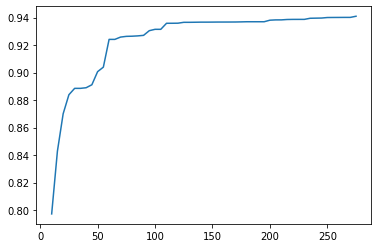

In [ ]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

In [ ]:
selector = SelectKBest(f_regression, k = 110)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

In [ ]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.885363
1,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.935176
2,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.935198
3,Polynomial,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.141971


## Logistic Regression


## Logistic function

$g(x) = {\dfrac {e^x}{1+e^x}}$

다른 말로 시그모이드(Sigmoid)함수라고 함. 그 모양이 S자와 유사한 성질이 있음.

독립변수의 선형결학을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법.

앞에서 선형회귀에서 우리는 1차 선형함수를 배웠다.

$y = Wx+b$

$y = W_1X_1+W_2X_2 +\cdots + W_nX_n +b$

오즈비

${\dfrac{p}{1-p}}$

$ln{\dfrac{p}{1-p}} = WX$

${\dfrac{p}{1-p}} = e^{WX}$

양변에 역수를 취하면,

${\dfrac{1-p}{p}} = {\dfrac{1}{p}}-1 = {\dfrac{1}{e^{WX}}}$

${\dfrac{1}{p}} = {\dfrac{1}{e^{WX}}} +1 = {\dfrac
{1}{e^{WX}}}+{\dfrac{e^{WX}}{e^{WX}}} = {\dfrac{1+e^{WX}}{e^{WX}}}$

다시 한번 역수를 취하면

$p = {\dfrac {e^{WX}}{1+e^{{WX}}}}$

우리가 아는 식으로 변형하면

$p = {\dfrac{e^{WX}}{1+e^{WX}}} \cdot {\dfrac{{\dfrac {1}{e^{WX}}}}{{\dfrac{1}{e^{WX}}}}} = {\dfrac{1}{\dfrac{1}{e^{WX}}+1}} = {\dfrac {1}{e^{-WX}}}$ 

위스콘신 유방암 예측

- 총 309개의 속성과 malignant(악성), benign(양성)의 타겟값을 가지고 있다

**데이터셋 조회**

빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.

key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

공통 key는 다음과 같습니다.

- data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- target: Label 데이터, Numpy 배열로 이루어져 있습니다.
- feature_names: Feature 데이터의 이름
- target_names: Label 데이터의 이름
- DESCR: 데이터 셋의 설명
- filename: 데이터 셋의 파일 저장 위치 (csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [ ]:
type(cancer)

In [ ]:
dir(cancer)

In [ ]:
cancer.data.shape

In [ ]:
cancer.feature_names

In [ ]:
cancer.target_names # malignant : 악성 / benign : 양성

In [ ]:
cancer.target

In [ ]:
np.bincount(cancer.target) # 빈도수

In [ ]:
print(cancer.DESCR)

In [ ]:
for i,name in enumerate(cancer.feature_names):
  print('%02d : %s' %(i,name))

In [ ]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [ ]:
len(cancer.feature_names)

In [ ]:
len(cancer.data)

In [ ]:
_, bins=np.histogram(cancer.data[:,0], bins=20)
print(_)
np.histogram(cancer.data[:,0], bins=20)

In [ ]:
plt.hist(malignant[:,0],bins=bins, alpha=0.3)
plt.hist(benign[:,0], bins=bins ,alpha=0.3)
plt.title(cancer.feature_names[0])

In [ ]:
plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)

    plt.hist(malignant[:,col],bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins ,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

In [ ]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state = 777)

    model = LogisticRegression(max_iter = 5000)
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]


In [ ]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

In [ ]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
#     f_,bins=np.histogram(cancer.data[:,col],bins=50)
#     plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
#     plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.scatter(cancer.data[:,col], cancer.target, c=cancer.target, alpha=0.5)
    
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
#     if col==0: plt.legend()

In [ ]:
#모든 속성에 대해서 한번에 그래프를 그릴수 없으므로 상관관계를 수치를 통해 데이터를 파악한다.
mat=np.corrcoef(cancer.data.T)  # 열로 읽으므로 Transpose 시켜줘야 한다.
mat

#상관계수: 모든 점에 대해서 (c1-c1')(c2-c2')을 나눠준 값의 합을 표준편차1,표준편차2,n으로 나눠준다.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
score

0.9298245614035088

# 앞에서 했던 타이타닉에도 로지스틱이 더 좋은 결과가 나옴


# 로지스틱 회귀 실습 3
- 독버섯 분류하기(https://www.kaggle.com/uciml/mushroom-classification)
- 목적 : 독버섯(poisonous)인지 식용버섯(edible)인지 분류하는 것.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mushroom = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
mushroom.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 라벨인코딩이라는 것은 이름으로 되어있는 것을 숫자로 혹은 그 반대로 변환하는 것입니다.
Labelencoder = LabelEncoder()
for col in mushroom.columns:
  mushroom[col] = Labelencoder.fit_transform(mushroom[col]) #column 별로 labelEncoder를 적용.

mushroom

In [ ]:
count_var = []

for col in mushroom.columns:
  count_var.append(mushroom[col].unique().sum()) #series로 접근->columns으로 접근하니깐 series와 똑같음
  #dataframe duplicated, duplicates ->중복 제거.
size = np.arange(len(count_var))


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,facecolor = 'r')
ax.bar(size,count_var,color = 'k')
ax.set(title = 'Unique elements per column',
       ylabel = 'No of unique elements',
       xlabel = 'Features')

In [ ]:
 mushroom.corr() 

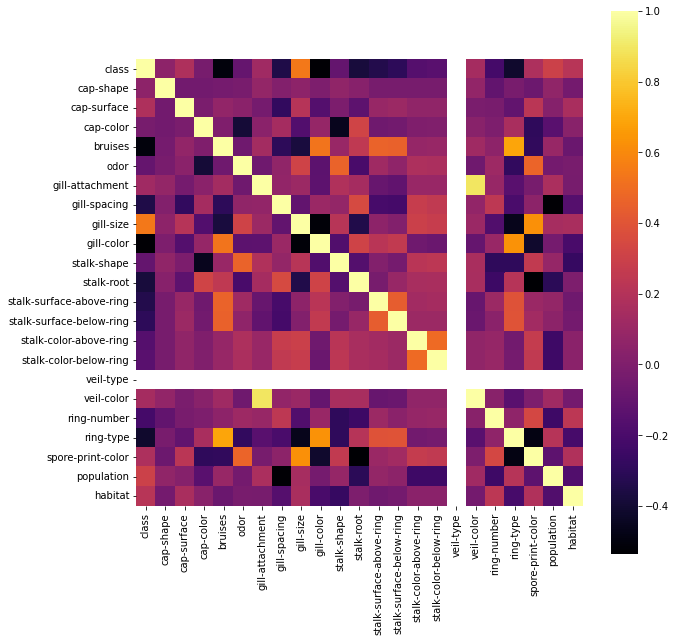

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(mushroom.corr(),cmap='inferno',square=True)

In [ ]:
target = mushroom['class']
train = mushroom.drop('class',axis = 1)

In [ ]:
fig=plt.figure(figsize = (15,10))
ax=fig.add_subplot(1,1,1,facecolor='blue')
pd.value_counts(target).plot(kind='bar', cmap = 'cool')
plt.title("Class distribution")

In [ ]:
def sigmoid(theta,X): #logstic regression = sigmoid (S자 형식)  
    X = np.array(X)
    theta = np.asarray(theta)
    return((1/(1+math.e**(-X.dot(theta)))))

In [ ]:
# Function for the cost function of the logistic regression.
#entropy를 측정->모델 불안한지?
def cost(theta, X, Y):
    first = np.multiply(-Y, np.log(sigmoid(theta,X))) 
    second = np.multiply((1 - Y), np.log(1 - sigmoid(theta,X)))
    return np.sum(first - second) / (len(X))

In [ ]:
# It calculates the gradient of the log-likelihood function.
def log_gradient(theta,X,Y):
    first_calc = sigmoid(theta, X) - np.squeeze(Y).T
    final_calc = first_calc.T.dot(X)
    return(final_calc.T)

In [ ]:
# This is the function performing gradient descent.
def gradient_Descent(theta,X,Y,itr_val,learning_rate=0.00001):
    cost_iter=[]
    cost_val=cost(theta,X,Y)
    cost_iter.append([0,cost_val])
    change_cost = 1
    itr = 0
    while(itr < itr_val):
        old_cost = cost_val
        theta = theta - (0.01 * log_gradient(theta,X,Y))
        cost_val = cost(theta,X,Y)
        cost_iter.append([i,cost])
        itr += 1
    return theta

In [ ]:
def pred_values(theta,X,hard=True):
    X = (X - np.mean(X,axis=0))/np.std(X,axis=0)
    pred_prob = sigmoid(theta,X)
    pred_value = np.where(pred_prob >= .5 ,1, 0)
    return pred_value

In [ ]:
theta = np.zeros((train.shape)[1])
theta = np.asmatrix(theta)
theta = theta.T
target = np.asmatrix(target).T
y_test = list(target)

In [ ]:
import math
params = [10,20,30,50,100]
for i in range(len(params)):
    th = gradient_Descent(theta,train,target,params[i])
    y_pred = list(pred_values(th, train))
    score = float(sum(1 for x,y in zip(y_pred,y_test) if x == y)) / len(y_pred)
    print("The accuracy after " + '{}'.format(params[i]) + " iterations is " + '{}'.format(score))

The accuracy after 10 iterations is 0.517971442639094
The accuracy after 20 iterations is 0.517971442639094
The accuracy after 30 iterations is 0.517971442639094
The accuracy after 50 iterations is 0.517971442639094
The accuracy after 100 iterations is 0.517971442639094


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train, target)
clf.score(train, target)

0.9519940915805022

## Linear regression (predicting a continuous value):

  - CalCOFI: Over 60 years of oceanographic data(https://www.kaggle.com/sohier/calcofi)
  : Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?

  - Weather in Szeged 2006-2016(https://www.kaggle.com/budincsevity/szeged-weather):  Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

  - Weather Conditions in World War Two(https://www.kaggle.com/smid80/weatherww2/data): Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?



## Logistic regression (predicting a categorical value, often with two categories):


- The Ultimate Halloween Candy Power Ranking(https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/): Can you predict if a candy is chocolate or not based on its other features?

- Epicurious - Recipes with Rating and Nutrition(https://www.kaggle.com/hugodarwood/epirecipes): Can you predict whether a recipe was part of #cakeweek based on whether it its other features?

## Poisson regression (predicting a count value):
 - Montreal bike lanes(https://www.kaggle.com/pablomonleon/montreal-bike-lanes): Use of bike lanes in Montreal city in 2015: Is there a relationship between the number of bicyclists who use different bike paths on the same day? Can you predict how many riders there will be on one path given how many are on another?

 - New York City - East River Bicycle Crossings(https://www.kaggle.com/new-york-city/nyc-east-river-bicycle-crossings): Daily bicycle counts for major bridges in NYC: Is there a relationship between the number of bicyclists who cross different bridges in New York?

 
 -(Requires some cleaning) UK 2016 Road Safety Data: Data from the UK Department for Transport (https://www.kaggle.com/bluehorseshoe/uk-2016-road-safety-data/data): Is there a relationship between the number of people in the car and the number of casualties in road accidents?




#### HW) Kaggle 숙제 House advanced regression problem 

(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)